In [1]:
import pynucastro as pyna

In [2]:
ecsn_rates = ["al27-ag-p31-ths8",
         "al27-pa-mg24-il10",
         "al27-pg-si28-il10",
         "mg24-ag-si28-st08",
         "mg24-ap-al27-il10",
         "mg24-ga-ne20-il10",
         "ne20-ag-mg24-il10",
         "ne20-ga-o16-co10",
         "o16-ag-ne20-co10",
         "o16-o16a-si28-cf88",
         "o16-o16p-p31-cf88",
         "p31-ga-al27-ths8",
         "p31-pa-si28-il10",
         "p31-pg-s32-il10",
         "p31-po16-o16-cf88",
         "s32-ga-si28-ths8",
         "s32-gp-p31-il10",
         "si28-ag-s32-ths8",
         "si28-ao16-o16-cf88",
         "si28-ap-p31-il10",
         "si28-ga-mg24-st08",
         "si28-gp-al27-il10",
         "f20--o20-toki",
         "ne20--f20-toki",
         "o20--f20-toki",
         "f20--ne20-toki"]
len(ecsn_rates)

26

In [3]:
ecsn = pyna.RateCollection(rate_files=ecsn_rates)
comp = pyna.Composition(ecsn.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

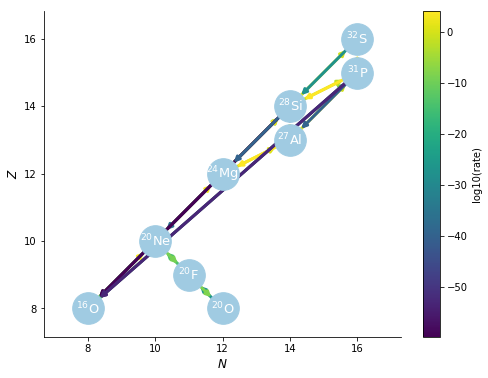

In [4]:
ecsn.plot(T=1.124422e9, rho=7.615707e9, comp=comp)

In [5]:
new_rate_list = []
ydots = ecsn.evaluate_rates(T=1.124422e9, rho=7.615707e9, composition=comp)
for rate in ecsn.rates:
    if ydots[rate] >= 1.e-30 and rate.weak == False:
    #if rate.weak == False:
        new_rate_list.append(rate)
        
ecsn_net = pyna.StarKillerNetwork(rates=new_rate_list)

In [6]:
print(ecsn_net)
print("The number of reactions in the ECSN network is",len(ecsn_net.rates))

al27 + he4 --> p31
al27 + p --> he4 + mg24
al27 + p --> si28
mg24 + he4 --> si28
mg24 + he4 --> p + al27
ne20 + he4 --> mg24
ne20 --> he4 + o16
o16 + he4 --> ne20
o16 + o16 --> he4 + si28
o16 + o16 --> p + p31
p31 + p --> he4 + si28
p31 + p --> s32
s32 --> he4 + si28
si28 + he4 --> s32
si28 + he4 --> p + p31
f20 --> o20
ne20 --> f20
o20 --> f20
f20 --> ne20

The number of reactions in the ECSN network is 19


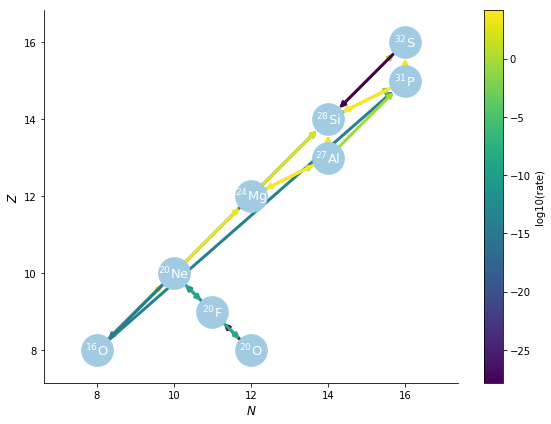

In [10]:
ecsn_net.plot(T=1.124422e9, rho=7.615707e9, comp=comp, outfile="ecsn_reaction.png")

In [8]:
print(ecsn_net.network_overview())

p
  consumed by:
     al27 + p --> he4 + mg24
     al27 + p --> si28
     p31 + p --> he4 + si28
     p31 + p --> s32
  produced by:
     mg24 + he4 --> p + al27
     o16 + o16 --> p + p31
     si28 + he4 --> p + p31

he4
  consumed by:
     al27 + he4 --> p31
     mg24 + he4 --> si28
     mg24 + he4 --> p + al27
     ne20 + he4 --> mg24
     o16 + he4 --> ne20
     si28 + he4 --> s32
     si28 + he4 --> p + p31
  produced by:
     al27 + p --> he4 + mg24
     ne20 --> he4 + o16
     o16 + o16 --> he4 + si28
     p31 + p --> he4 + si28
     s32 --> he4 + si28

o16
  consumed by:
     o16 + he4 --> ne20
     o16 + o16 --> he4 + si28
     o16 + o16 --> p + p31
  produced by:
     ne20 --> he4 + o16

o20
  consumed by:
     o20 --> f20
  produced by:
     f20 --> o20

f20
  consumed by:
     f20 --> o20
     f20 --> ne20
  produced by:
     ne20 --> f20
     o20 --> f20

ne20
  consumed by:
     ne20 + he4 --> mg24
     ne20 --> he4 + o16
     ne20 --> f20
  produced by:
     o16 + he4 --

In [9]:
ecsn_net.write_network(use_cse=True)